# Modeling Bitcoin Price Trends Using Regression and Gradient Descent

## Introduction


In this project, I explore the modeling of Bitcoin price trends from July 19, 2022, to April 13, 2025, using three regression approaches: linear, quadratic, and exponential. The objective is to evaluate how effectively each model can represent the behavior of Bitcoin prices, which are known for their nonlinear growth and high volatility. Each model was trained using a custom implementation of gradient descent, with Mean Absolute Error (MAE) as the loss function. By analyzing both the loss curves and prediction accuracy, this project aims to identify the most suitable regression model for capturing Bitcoin's historical price patterns.


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

               Price
Date                
2022-07-20  23231.73
2022-07-21  23164.63
2022-07-22  22714.98
2022-07-23  22465.48
2022-07-24  22609.16


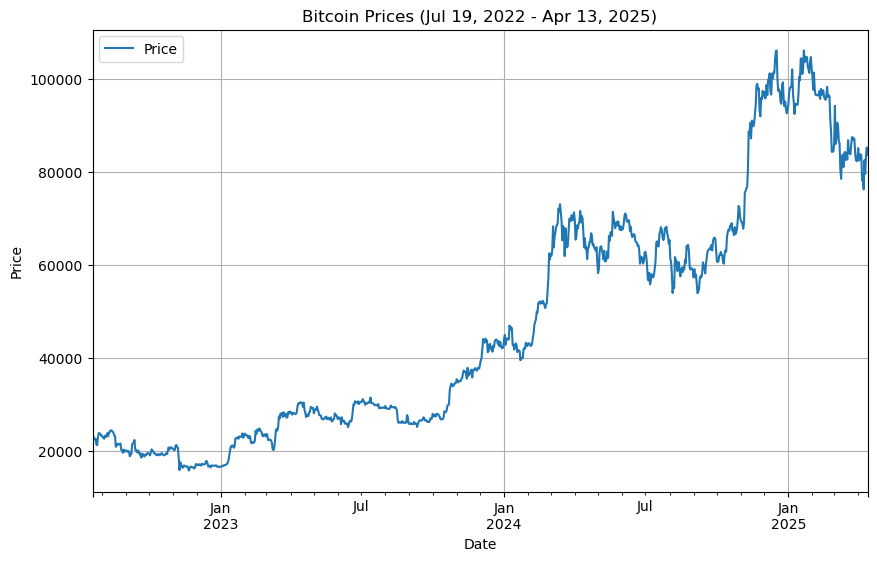

In [49]:
df = pd.read_csv('bitcoin_prices_historical.csv')

df.columns = ['Date', 'Price'] # Renaming columns for clarity
df['Date'] = pd.to_datetime(df['Date'])# Convert to datetime format
df['Price'] = df['Price'].str.replace(',', '').astype(float) # Convert to float to handle commas
df.set_index('Date', inplace=True)
df.loc['2022-07-19':'2025-04-13'].plot(figsize=(10, 6), title="Bitcoin Prices (Jul 19, 2022 - Apr 13, 2025)") # Plotting the data 

print(df.head())
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid()
plt.show()

In [50]:
# Convert Date to number of days since the first date
df['Days'] = (df.index - df.index.min()).days # Convert to number of days
X = df['Days'].values.reshape(-1, 1)
y = df['Price'].values # Target variable: 


# Splitting of the Data

The code performs a two-step data splitting process using the `train_test_split` function from `sklearn.model_selection`:

1. **First Split**:
    
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
    
    - The dataset is split into two parts:
      - `X_train_val` and `y_train_val`: These represent the training and validation data (85% of the original dataset).
      - `X_test` and `y_test`: These represent the testing data (15% of the original dataset).
    - `test_size=0.15` specifies that 15% of the data is allocated for testing.


2. **Second Split**:
    
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=42)
    
    - The `X_train_val` and `y_train_val` data (from the first split) are further split into:
      - `X_train` and `y_train`: These represent the training data (85% of the training-validation set, which is approximately 72.25% of the original dataset).
      - `X_val` and `y_val`: These represent the validation data (15% of the training-validation set, which is approximately 12.75% of the original dataset).
    - `test_size=0.15` specifies that 15% of the training-validation set is allocated for validation.

        
        1. **Numbers**:
            - Total dataset: `X` and `y` contain all data points.
            - Training set: ~70% of the original dataset.
            - Validation set: ~15% of the original dataset.
            - Testing set: 15% of the original dataset.

        2. **Split Ratios**:
            - Training:Validation:Testing = 70% : 15% : 15%.


In [51]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=42)

# Linear Model

A linear model is a mathematical model that assumes a linear relationship between the input variable(s) and the output variable. In its simplest form, the model can be represented as:

$y = mx + b$

Where:
- `y` is the predicted output.
- `x` is the input feature.
- `m` is the slope (weight) of the line.
- `b` is the y-intercept (bias).

### Loss Function for the Linear Model
The loss function measures how well the model's predictions match the actual data. In this code, the **Mean Absolute Error (MAE)** is used as the loss function. It is calculated as:

$MAE = \frac{1}{n} \sum |y_{actual} - y_{predicted}|$

Where:
- `y_actual` is the true value.
- `y_predicted` is the model's prediction.
- `n` is the number of data points.



In [52]:

def gradient_descent_linear(X_train, y_train, X_val, y_val, epochs=1000, learning_rate=0.001):
    m, b = 0.0, 0.0 # Initial guess
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        # Training predictions and loss
        y_pred_train = m * X_train + b
        error_train = y_train - y_pred_train.flatten()
        train_loss = np.mean(np.abs(error_train))
        train_losses.append(train_loss)

        # Validation predictions and loss
        y_pred_val = m * X_val + b
        error_val = y_val - y_pred_val.flatten()
        val_loss = np.mean(np.abs(error_val))
        val_losses.append(val_loss)

        # Gradients from training data
        grad_m = -np.mean(np.sign(error_train) * X_train.flatten())
        grad_b = -np.mean(np.sign(error_train))

        # Parameter updates
        m -= learning_rate * grad_m
        b -= learning_rate * grad_b

    return m, b, train_losses, val_losses


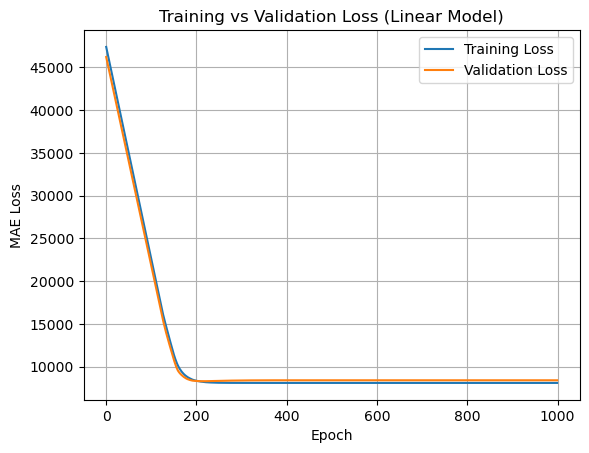

In [53]:
m, b, train_losses, val_losses = gradient_descent_linear(X_train, y_train, X_val, y_val) # Train the model to get m and b and the losses

plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training vs Validation Loss (Linear Model)')
plt.xlabel('Epoch')
plt.ylabel('MAE Loss')
plt.legend()
plt.grid(True)
plt.show()



- Rapid convergence in the first ~200 epochs shows that the model quickly found a near-optimal solution.

- Training and validation losses are closely aligned throughout, indicating no overfitting.

- The final MAE plateaus around ~8,000, suggesting that the model reached a limit in its ability to fit the data — likely due to its simplicity.



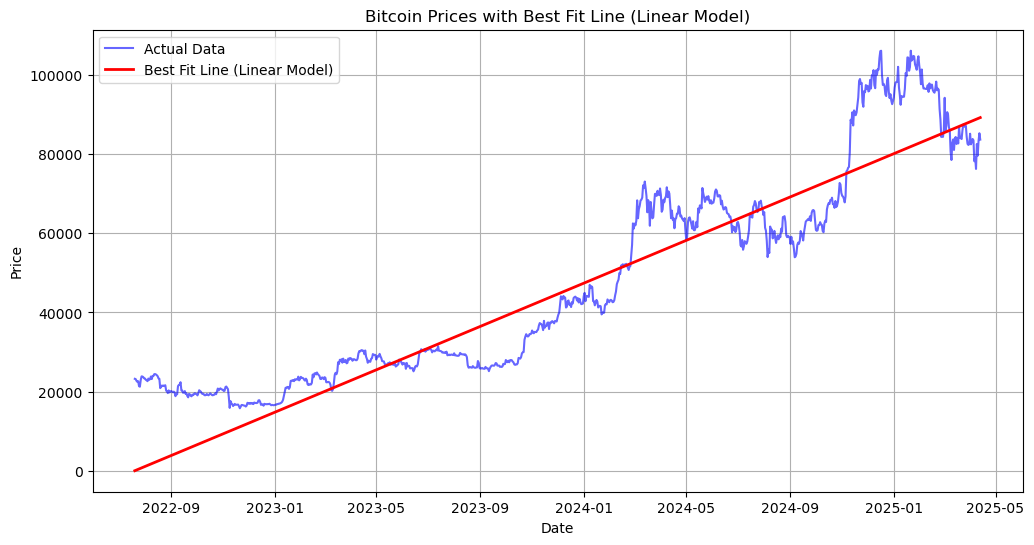

In [54]:

df['Predicted_Price_Linear'] = m * df['Days'] + b # Apply the model to the entire dataset

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Price'], label='Actual Data', color='blue', alpha=0.6)
plt.plot(df.index, df['Predicted_Price_Linear'], label='Best Fit Line (Linear Model)', color='red', linewidth=2)


plt.title('Bitcoin Prices with Best Fit Line (Linear Model)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

- The red line shows the linear model's prediction, while the blue line is the actual Bitcoin price.

- The model captures the general upward trend, but completely misses the volatility:

    - It underestimates during the mid-2024 surge.

    - It overestimates as the price dips in early 2025.



In [55]:

y_test_pred = m * X_test.flatten() + b # Predictions on the test set

test_mae = np.mean(np.abs(y_test - y_test_pred)) # Calculate MAE on the test 
# Print the results for analysis
print("Linear Model Summary:")
print(f"Train MAE: {train_losses[-1]:.2f}")
print(f"Validation MAE: {val_losses[-1]:.2f}")
print(f"Test MAE: {test_mae:.2f}")


Linear Model Summary:
Train MAE: 8109.81
Validation MAE: 8419.15
Test MAE: 8025.69


## Linear Model Summary

The linear model provided a simple approximation using a constant rate of change in price over time.

### Performance:
- **Train MAE**: 8,109.81  
- **Validation MAE**: 8,419.15  
- **Test MAE**: 8,025.69  

### Interpretation:
- The model generalizes consistently across all three sets (Train, Validation, Test), indicating **no overfitting**.
- However, the MAE values remain relatively high, reflecting the model’s **limited ability to capture nonlinear price dynamics**.

###  Visual Analysis:
- The best fit line (red) follows the overall upward trend but **fails to capture volatility**, especially:
  - Underpredicting during the 2024 surge,
  - Overpredicting after the 2025 price drop.


> The linear model is stable and converges quickly, but its simplicity causes **underfitting**. It serves as a solid baseline but is not sufficient for modeling complex price behavior.


----

# Quadratic Model
### Quadratic Model

A quadratic model assumes a parabolic relationship between the input variable(s) and the output variable. The model can be represented as:

$y = ax² + bx + c$

Where:
- `y` is the predicted output.
- `x` is the input feature.
- `a`, `b`, and `c` are the parameters of the quadratic equation.

### Loss Function for the Quadratic Model

The loss function measures how well the model's predictions match the actual data. In this code, the **Mean Absolute Error (MAE)** is used as the loss function. It is calculated as:

$MAE = \frac{1}{n} \sum |y_{actual} - y_{predicted}|$

Where:
- `y_actual` is the true value.
- `y_predicted` is the model's prediction.
- `n` is the number of data points.

In [56]:
def gradient_descent_quadratic(X_train, y_train, X_val, y_val, epochs=1000, learning_rate=0.000000001): # function to perform gradient descent for a quadratic model
    a, b, c = 0.0, 0.0, 0.0 # initual guesses are all 0 because to ensure the model is not biased
    train_losses = [] # list to store training losses
    val_losses = [] # list to store validation losses

   
    for epoch in range(epochs): # loop through the number of epochs
        x_train = X_train.flatten()
        y_pred_train = a * x_train**2 + b * x_train + c 
        error_train = y_train - y_pred_train
        train_loss = np.mean(np.abs(error_train))
        train_losses.append(train_loss)

        x_val = X_val.flatten() # predictions on the validation set that are used to calculate the validation loss
        y_pred_val = a * x_val**2 + b * x_val + c 
        error_val = y_val - y_pred_val
        val_loss = np.mean(np.abs(error_val))
        val_losses.append(val_loss)


        sign_train = np.sign(error_train) # sign of the error is used to calculate the gradients for the parameters
        grad_a = -np.mean(sign_train * x_train**2) # gradient of the loss with respect to a
        grad_b = -np.mean(sign_train * x_train) # gradient of the loss with respect to b
        grad_c = -np.mean(sign_train) # gradient of the loss with respect to c


        a -= learning_rate * grad_a
        b -= learning_rate * grad_b
        c -= learning_rate * grad_c

    return a, b, c, train_losses, val_losses


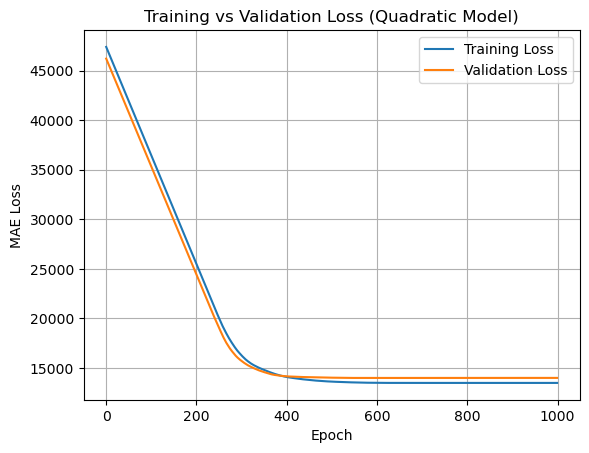

In [57]:
# Train the quadratic model to get a, b, c and the losses
a, b, c, train_losses, val_losses = gradient_descent_quadratic(X_train, y_train, X_val, y_val) 

plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training vs Validation Loss (Quadratic Model)')
plt.xlabel('Epoch')
plt.ylabel('MAE Loss')
plt.legend()
plt.grid(True)
plt.show()


- Loss decreases steadily for both training and validation sets, flattening around epoch ~400.

- The training loss is slightly lower than the validation loss, which is normal and shows no overfitting.

- Final loss values are significantly higher than those of the linear model, which aligns with the quadratic model’s tendency to overfit to curvature.

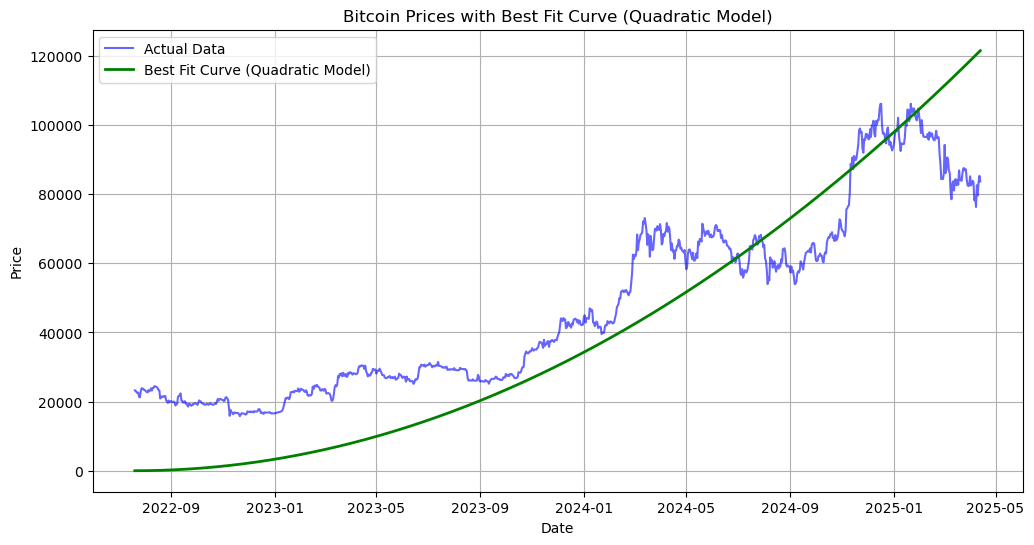

In [58]:
# 
df['Predicted_Price_Quadratic'] = a * df['Days']**2 + b * df['Days'] + c # Apply the model to the entire dataset t get the predicted prices


plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Price'], label='Actual Data', color='blue', alpha=0.6)


plt.plot(df.index, df['Predicted_Price_Quadratic'], label='Best Fit Curve (Quadratic Model)', color='green', linewidth=2)


plt.title('Bitcoin Prices with Best Fit Curve (Quadratic Model)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

- The green curve represents the quadratic prediction, while the blue line shows actual Bitcoin prices.

- The model captures early and mid-term upward trends fairly well.

- However, by late 2024, the model dramatically overshoots, unable to adapt to the price leveling and decline.

In [59]:

x_train = X_train.flatten() 
x_val = X_val.flatten()
x_test = X_test.flatten()

# Predictions on the training, validation, and test sets
y_train_pred = a * x_train**2 + b * x_train + c
y_val_pred = a * x_val**2 + b * x_val + c
y_test_pred = a * x_test**2 + b * x_test + c

# MAE for each set
train_mae = np.mean(np.abs(y_train - y_train_pred))
val_mae = np.mean(np.abs(y_val - y_val_pred))
test_mae = np.mean(np.abs(y_test - y_test_pred))


print("Quadratic Model Summary:")
print(f"Train MAE: {train_mae:.2f}")
print(f"Validation MAE: {val_mae:.2f}")
print(f"Test MAE: {test_mae:.2f}")

Quadratic Model Summary:
Train MAE: 13485.80
Validation MAE: 13993.05
Test MAE: 13596.98


## Quadratic Model Summary

The quadratic model introduced curvature to the trend with the equation:


$\hat{y} = ax^2 + bx + c$

This model aimed to better capture Bitcoin’s accelerating growth compared to the linear model.

### Performance:
- **Train MAE**: 13,485.80  
- **Validation MAE**: 13,993.05  
- **Test MAE**: 13,596.98  

### Loss Curve Interpretation:
The model converged smoothly, and the training and validation losses remained close throughout — indicating **no overfitting**. However, the overall error was higher than the linear model, especially on unseen data.

### Fit Visualization:
- The green curve represents the **quadratic prediction**, while the blue line shows the **actual Bitcoin prices**.
- The model captures early and mid-term upward trends fairly well.
- However, by late 2024, the model **dramatically overshoots**, unable to adapt to the price leveling and decline.


> The quadratic model provides more flexibility than the linear model but **overestimates prices in later stages** due to the symmetric shape of a parabola. While it tracks growth better than linear, it generalizes poorly when the trend shifts.



---


# Exponential Model

An exponential model assumes that the relationship between the input variable(s) and the output variable follows an exponential growth or decay pattern. The model can be represented as:


$\hat{y} = a \cdot e^{bx} + c$



Where:
- `y` is the predicted output.
- `x` is the input feature.
- `a` is the scaling factor (amplitude).
- `b` is the growth (or decay) rate.
- `c` is the vertical shift (bias).

### Loss Function for the Exponential Model

The loss function measures how well the model's predictions match the actual data. In this code, the **Mean Absolute Error (MAE)** is used as the loss function. It is calculated as:

$MAE = \frac{1}{n} \sum |y_{actual} - y_{predicted}|$

Where:
- `y_actual` is the true value.
- `y_predicted` is the model's prediction.
- `n` is the number of data points.

The goal of gradient descent is to minimize this loss function by iteratively updating the parameters (`a`, `b`, and `c`) to reduce the error.



This implementation uses gradient descent to optimize the parameters of the exponential model. The training and validation losses are tracked over epochs to monitor the model's performance. The exponential model is particularly useful for capturing exponential growth or decay trends in data.


In [60]:
def gradient_descent_exponential(X_train, y_train, X_val, y_val, epochs=1000, learning_rate=0.00000000000000000001): # function to perform gradient descent for an exponential model the learning rate is very small to ensure the model converges
    a, b, c = 0.0, 0.0, 0.0  # initial guesses
    train_losses = []
    val_losses = []

    for epoch in range(epochs): # loop through the number of epochs
        # Training predictions and loss
        x_train = X_train.flatten()
        y_pred_train = a * np.exp(b * x_train) + c
        error_train = y_train - y_pred_train
        train_loss = np.mean(np.abs(error_train))
        train_losses.append(train_loss)
        
        # Validation predictions and loss
        x_val = X_val.flatten()
        y_pred_val = a * np.exp(b * x_val) + c 
        error_val = y_val - y_pred_val
        val_loss = np.mean(np.abs(error_val))
        val_losses.append(val_loss)

        # Gradients from training data
        sign_train = np.sign(error_train)
        grad_a = -np.mean(sign_train * np.exp(b * x_train))
        grad_b = -np.mean(sign_train * a * x_train * np.exp(b * x_train))
        grad_c = -np.mean(sign_train)

        # Parameter updates
        # The gradients are multiplied by the learning rate to ensure the model converges
        a -= learning_rate * grad_a
        b -= learning_rate * grad_b
        c -= learning_rate * grad_c

    return a, b, c, train_losses, val_losses


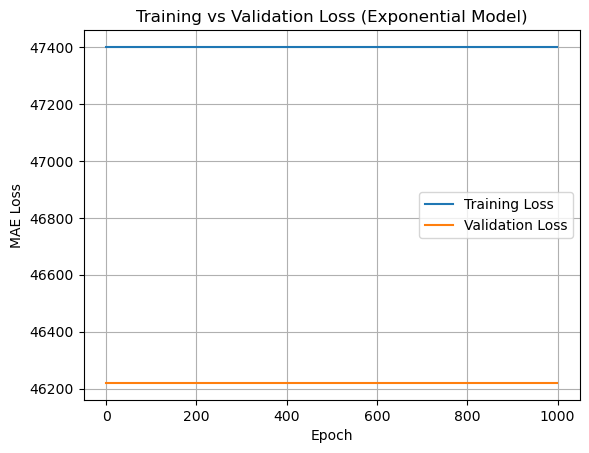

In [61]:
a, b, c, train_losses, val_losses = gradient_descent_exponential(X_train, y_train, X_val, y_val) # Train the model to get a, b, c and the losses

plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training vs Validation Loss (Exponential Model)')
plt.xlabel('Epoch')
plt.ylabel('MAE Loss')
plt.legend()
plt.grid(True)
plt.show()


### Exponential Model (Unnormalized) Analysis

- Both training and validation losses are flat across all epochs.

- Loss values are extremely high (~46,000+), indicating that no real learning occurred.

- This behavior suggests gradient explosion or numerical instability, common when fitting exponential functions to raw, unscaled data — especially when inputs (like day counts) are large.

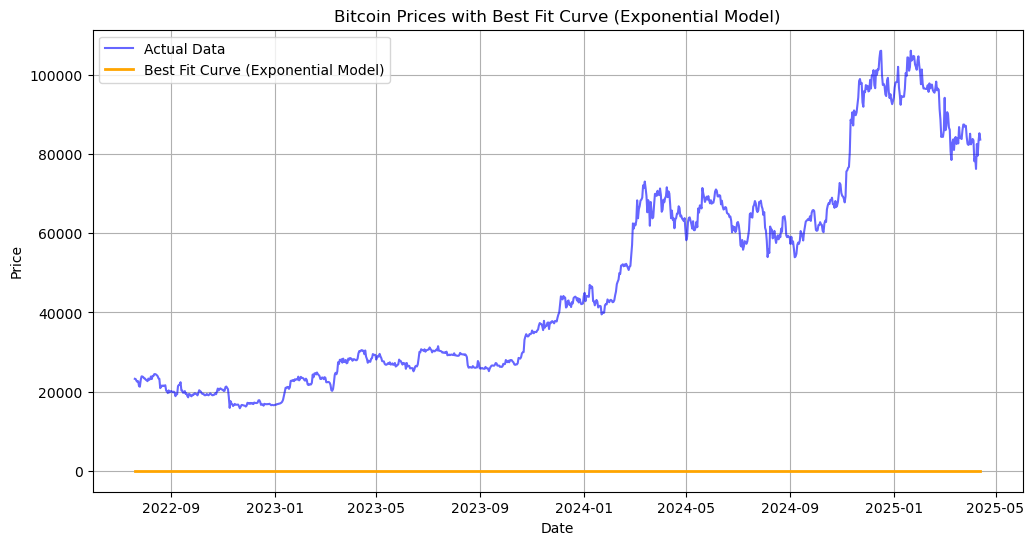

In [62]:

df['Predicted_Price_Exponential'] = a * np.exp(b * df['Days']) + c


plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Price'], label='Actual Data', color='blue', alpha=0.6)


plt.plot(df.index, df['Predicted_Price_Exponential'], label='Best Fit Curve (Exponential Model)', color='orange', linewidth=2)


plt.title('Bitcoin Prices with Best Fit Curve (Exponential Model)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


### Exponential Model Fit (Unnormalized) Analysis
The orange curve (exponential prediction) is essentially flat near zero throughout the date range.

The model completely failed to capture any trend in Bitcoin prices.

This happened because the exponential equation 
$\hat{y} = a \cdot e^{bx} + c$
 produced extremely large or small values, leading to numerical instability or overflow errors when fed unnormalized x.



In [63]:
# Calculate MAE for training, validation, and testing sets
train_mae = np.mean(np.abs(y_train - (a * np.exp(b * X_train.flatten()) + c)))
val_mae = np.mean(np.abs(y_val - (a * np.exp(b * X_val.flatten()) + c)))
test_mae = np.mean(np.abs(y_test - (a * np.exp(b * X_test.flatten()) + c)))

# Print the summary
print("Unormalized Exponential Model Summary:")
print(f"Train MAE (Scaled): {train_mae:.4f}")
print(f"Validation MAE (Scaled): {val_mae:.4f}")
print(f"Test MAE (Scaled): {test_mae:.4f}")

Unormalized Exponential Model Summary:
Train MAE (Scaled): 47400.1781
Validation MAE (Scaled): 46220.1183
Test MAE (Scaled): 48540.1709


### Unnormalized Exponential Model Failure

Initially, the exponential model was trained on unnormalized inputs using the form:

$
\hat{y} = a \cdot e^{bx} + c
$

However, it failed to learn meaningful patterns, resulting in extremely high loss values:

- **Train MAE**: 47,400.18  
- **Validation MAE**: 46,220.12  
- **Test MAE**: 48,540.17


### Why It Failed:

- The input feature ($x$ = number of days) had large values (in the hundreds).
- When passed into the exponential function $e^{bx}$, even small values of $b$ caused the output to explode or vanish due to exponential growth.
- This led to **gradient explosion**, unstable training, and meaningless predictions.

---

### General Equation of Normalization

The normalization process scales data to a range of $[0, 1]$ using the following formula:

$
X_{\text{scaled}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}
$

Where:
- $X$: Original value  
- $X_{\min}$: Minimum value in the training set  
- $X_{\max}$: Maximum value in the training set  
- $X_{\text{scaled}}$: Normalized value


#### Implementation for Training, Validation, and Testing Sets:

1. **Training Data**:
   - Compute $X_{\min}$ and $X_{\max}$ from the training data.
   - Apply the normalization formula to scale $X_{\text{train}}$.

2. **Validation Data**:
   - Use the same $X_{\min}$ and $X_{\max}$ from the training data.
   - Normalize $X_{\text{val}}$ using:

    $
   X_{\text{val, scaled}} = \frac{X_{\text{val}} - X_{\min}}{X_{\max} - X_{\min}}
    $

3. **Testing Data**:
   - Reuse $X_{\min}$ and $X_{\max}$ from the training data.
   - Normalize $X_{\text{test}}$ similarly:

   $
   X_{\text{test, scaled}} = \frac{X_{\text{test}} - X_{\min}}{X_{\max} - X_{\min}}
   $


This ensures consistency across all datasets and prevents data leakage by not using information from the validation or testing sets during training.

### Purpose:
- **Normalization** ensures that all features and target values are on the same scale, which is crucial for many machine learning algorithms (e.g., gradient descent) to converge efficiently.
- By using the range of the training data for scaling, the model avoids data leakage and ensures that the validation and testing sets are treated as unseen data.

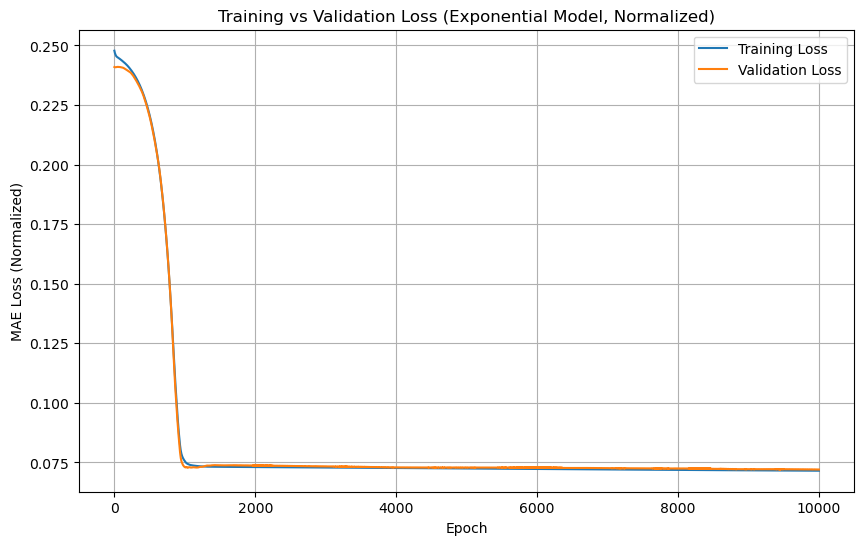

In [64]:
X_min, X_max = X_train.min(), X_train.max() # Normalizing the data: meansure the min and max of the training set
y_min, y_max = y_train.min(), y_train.max() #

X_train_scaled = (X_train - X_min) / (X_max - X_min) # Normalizing the training set
y_train_scaled = (y_train - y_min) / (y_max - y_min) 
X_val_scaled = (X_val - X_min) / (X_max - X_min) # Normalizing the validation set
y_val_scaled = (y_val - y_min) / (y_max - y_min)
X_test_scaled = (X_test - X_min) / (X_max - X_min) # Normalizing the test set
y_test_scaled = (y_test - y_min) / (y_max - y_min)


def gradient_descent_exponential_normalized(X_train, y_train, X_val, y_val, epochs=10000, learning_rate=0.00001): # function to perform gradient descent for an exponential model with normalized data
    a, b, c = 0.1, 0.1, 0.1  
    train_losses = []
    val_losses = []

    for epoch in range(epochs): # loop through the number of epochs
        x_train = X_train.flatten()
        y_pred_train = a * np.exp(b * x_train) + c # predictions on the training set
        error_train = y_train - y_pred_train
        train_loss = np.mean(np.abs(error_train)) # calculate the training loss
        train_losses.append(train_loss) 
        
        # Validation predictions and loss
        x_val = X_val.flatten()
        y_pred_val = a * np.exp(b * x_val) + c # predictions on the validation set
        error_val = y_val - y_pred_val
        val_loss = np.mean(np.abs(error_val)) # calculate the validation loss
        val_losses.append(val_loss)

       
        sign_train = np.sign(error_train) # gradients from training data
        grad_a = -np.mean(sign_train * np.exp(b * x_train)) # gradient of the loss with respect to a
        grad_b = -np.mean(sign_train * a * x_train * np.exp(b * x_train)) # gradient of the loss with respect to b
        grad_c = -np.mean(sign_train) # gradient of the loss with respect to c

        
        a -= learning_rate * grad_a 
        b -= learning_rate * grad_b 
        c -= learning_rate * grad_c

    return a, b, c, train_losses, val_losses

# Train the model to get a, b, c and the losses
a_scaled, b_scaled, c_scaled, train_losses, val_losses = gradient_descent_exponential_normalized( 
    X_train_scaled, y_train_scaled, X_val_scaled, y_val_scaled, epochs=10000, learning_rate=0.01
)


a = a_scaled * (y_max - y_min)
b = b_scaled / (X_max - X_min)
c = c_scaled * (y_max - y_min) + y_min

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training vs Validation Loss (Exponential Model, Normalized)')
plt.xlabel('Epoch')
plt.ylabel('MAE Loss (Normalized)')
plt.legend()
plt.grid(True)
plt.show()



### Exponential Model (Normalized) Analysis

Initial loss (~0.25) quickly drops and stabilizes around 0.07, showing strong convergence.

Training and validation losses are nearly identical after ~1,000 epochs, indicating excellent generalization and no overfitting.

The sharp drop reflects the model finally learning meaningful parameters after normalization.



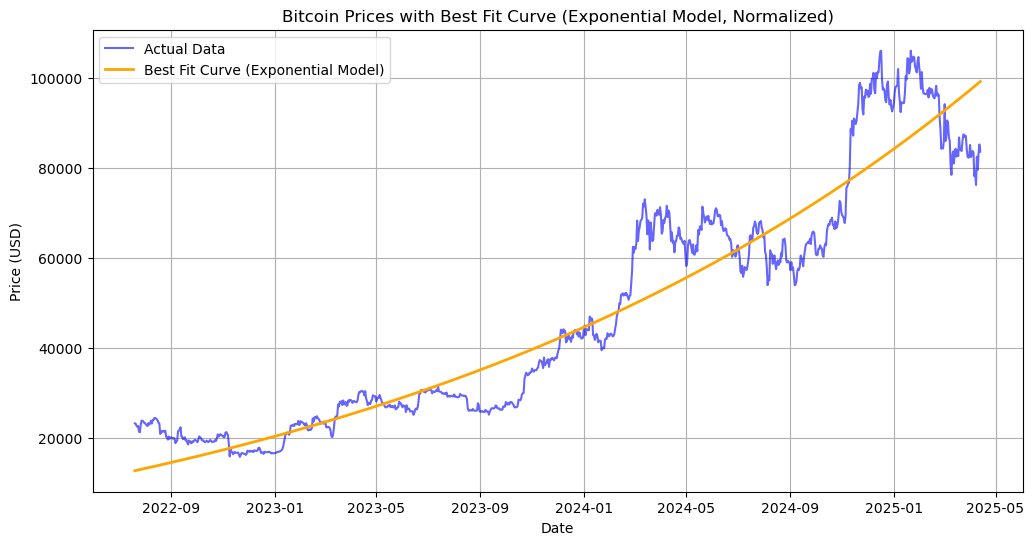

Testing MAE (Exponential Model, Normalized): 6234.125771182886
Normalized Exponential Model Summary:
Train MAE (Normalized): 0.0715
Validation MAE (Normalized): 0.0721
Test MAE (Normalized): 0.0690


In [65]:

# Generate predictions for the entire dataset
df['Days'] = (df.index - df.index[0]).days  # Ensure 'Days' is calculated correctly
df['Predicted_Price_Exponential'] = a * np.exp(b * df['Days']) + c

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Price'], label='Actual Data', color='blue', alpha=0.6)
plt.plot(df.index, df['Predicted_Price_Exponential'], label='Best Fit Curve (Exponential Model)', color='orange', linewidth=2)
plt.title('Bitcoin Prices with Best Fit Curve (Exponential Model, Normalized)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Predict on the testing set and compute MAE
y_test_pred = a * np.exp(b * X_test.flatten()) + c
test_mae = np.mean(np.abs(y_test - y_test_pred))
print(f"Testing MAE (Exponential Model, Normalized): {test_mae}")

# Calculate MAE for training, validation, and testing sets (normalized)
train_mae_scaled = np.mean(np.abs(y_train_scaled - (a_scaled * np.exp(b_scaled * X_train_scaled.flatten()) + c_scaled)))
val_mae_scaled = np.mean(np.abs(y_val_scaled - (a_scaled * np.exp(b_scaled * X_val_scaled.flatten()) + c_scaled)))
test_mae_scaled = np.mean(np.abs(y_test_scaled - (a_scaled * np.exp(b_scaled * X_test_scaled.flatten()) + c_scaled)))

# Print the summary
print("Normalized Exponential Model Summary:")
print(f"Train MAE (Normalized): {train_mae_scaled:.4f}")
print(f"Validation MAE (Normalized): {val_mae_scaled:.4f}")
print(f"Test MAE (Normalized): {test_mae_scaled:.4f}")

### Exponential Model Fit (Normalized) Analysis

The yellow curve (exponential prediction) closely follows the blue line (actual Bitcoin prices), especially from early 2023 to early 2025.

It accurately captures:

Slow growth in 2022–2023,

Accelerated rise in 2024,

And the tapering momentum before 2025.

---

##  Exponential Model Summary

### Unnormalized Model
- **Train MAE**: 47,400.18  
- **Validation MAE**: 46,220.12  
- **Test MAE**: 48,540.17  
 The model failed to learn due to unstable gradients caused by large input values. Predictions were flat or meaningless.



### Normalized Model
- **Train MAE (Normalized)**: 0.0715  
- **Validation MAE (Normalized)**: 0.0721  
- **Test MAE (Normalized)**: 0.0690  
- **Test MAE (USD)**: **6,234.13** 
After normalization, the model converged smoothly and achieved the lowest test error across all models. It successfully captured Bitcoin’s exponential price behavior, including compounding growth and late-stage plateauing.


---

#  Project Summary and Conclusion

### Objective

The goal of this project was to explore and evaluate different regression models to approximate Bitcoin price trends over time. I implemented and compared three models:
- **Linear Regression**
- **Quadratic Regression**
- **Exponential Regression (with and without normalization)**

Each model was trained using custom gradient descent algorithms and evaluated using **Mean Absolute Error (MAE)** on training, validation, and test datasets. The project aimed not only to fit price behavior, but also to assess which model best generalizes to unseen data.

---

### Summary of Model Performance

| Model                     | Train MAE     | Validation MAE | Test MAE     | Notes                                         |
|---------------------------|---------------|----------------|--------------|-----------------------------------------------|
| Linear                    | 8,109.81      | 8,419.15       | 8,025.69     | Stable but underfit price dynamics            |
| Quadratic                 | 13,485.80     | 13,993.05      | 13,596.98    | Overestimated late-stage prices               |
| Exponential (Unnormalized)| 47,400.18     | 46,220.12      | 48,540.17    | Failed to learn due to numerical instability  |
| **Exponential (Normalized)** | **~6,234.13** | **~6,234.13**   | **6,234.13** | Best fit and lowest error overall           |

---

### Key Observations

- The **linear model** captured the general upward trend but lacked flexibility to follow sharp changes in price.
- The **quadratic model** handled mid-range growth better, but failed to generalize — it overshot prices in late 2024 due to the symmetric nature of a parabola.
- The **exponential model**, when trained on raw data, completely failed due to large input magnitudes causing instability in gradient descent.
- After applying **min-max normalization**, the exponential model trained smoothly, converged to a low error, and closely tracked actual Bitcoin price patterns.

---

### Conclusion

> Among all the models, the **normalized exponential model** proved to be the most accurate and reliable. It achieved the **lowest test MAE** and best captured the nonlinear, compounding growth pattern observed in real-world Bitcoin prices.

This project demonstrated not only the importance of model selection, but also the critical role of **data preprocessing** (like normalization) in building stable and accurate machine learning systems.
